In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/income-Kmeans.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


Text(0, 0.5, 'Income($)')

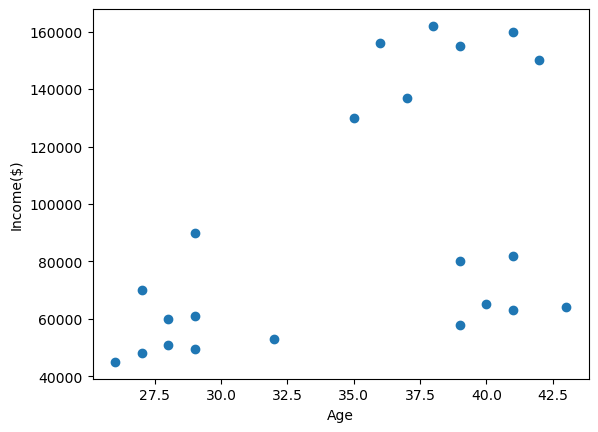

In [4]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
scaler = MinMaxScaler()
df[['Age' , 'Income($)']] = scaler.fit_transform(df[['Age' , 'Income($)']])

In [6]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [7]:
df.drop('Name' , axis = 1 , inplace = True)
df.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


## ElBow Method

In [8]:
scores_list = []
k_range = range(1,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k , random_state = 42)
    kmeans_model.fit(df)
    scores_list.append(kmeans_model.inertia_)

Text(0, 0.5, 'Sum of Squared Error')

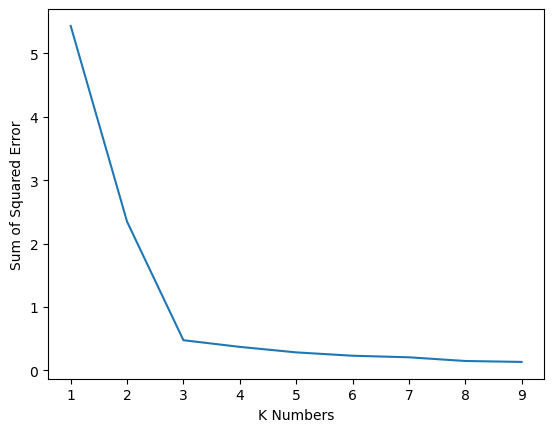

In [9]:
plt.plot(k_range , scores_list)
plt.xlabel('K Numbers')
plt.ylabel('Sum of Squared Error')

## silhouette_score

In [10]:
scores = []
sillouette_scores = []
k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k, random_state = 42)
    y_pred = kmeans_model.fit_predict(df)
    scores.append(kmeans_model.inertia_)
    sillouette_scores.append(silhouette_score(df, y_pred))
    print("K = ", k, " : ",  kmeans_model.inertia_)
    print("Silhoutte Score : %0.4f" % silhouette_score(df, y_pred))

K =  2  :  2.3456144914725936
Silhoutte Score : 0.5305
K =  3  :  0.4750783498553096
Silhoutte Score : 0.7130
K =  4  :  0.36986589192348335
Silhoutte Score : 0.6136
K =  5  :  0.2829404587160481
Silhoutte Score : 0.4663
K =  6  :  0.2301425286224033
Silhoutte Score : 0.4579
K =  7  :  0.20548769627526323
Silhoutte Score : 0.4494
K =  8  :  0.1471853679399594
Silhoutte Score : 0.3155
K =  9  :  0.13246345557512865
Silhoutte Score : 0.2898


In [11]:
#maximize silhoutte score ----> k = 3

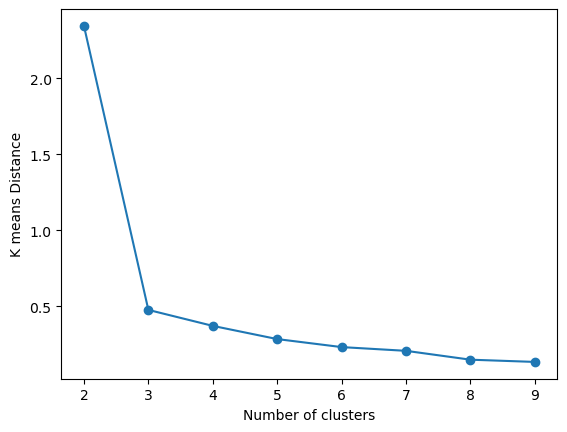

In [12]:
plt.plot(k_range , scores, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel("K means Distance")
plt.show()

## kmeans Clustering

In [13]:
kmeans_model = KMeans(n_clusters = 3 , random_state = 42)
kmeans_model.fit(df)
y_pred = kmeans_model.predict(df)

In [14]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [15]:
df['Cluster'] = y_pred
df

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [16]:
#to print cluster centers
kmeans_model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [17]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

In [18]:
df0

,Age,Income($),Cluster
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0
10,0.647059,0.786325,0


In [19]:
df1

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
11,0.000000,0.000000,1
12,0.058824,0.025641,1
13,0.117647,0.051282,1
14,0.176471,0.038462,1
15,0.352941,0.068376,1


In [20]:
df2

,Age,Income($),Cluster
16,0.823529,0.170940,2
17,0.882353,0.153846,2
18,1.000000,0.162393,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2
21,0.764706,0.111111,2


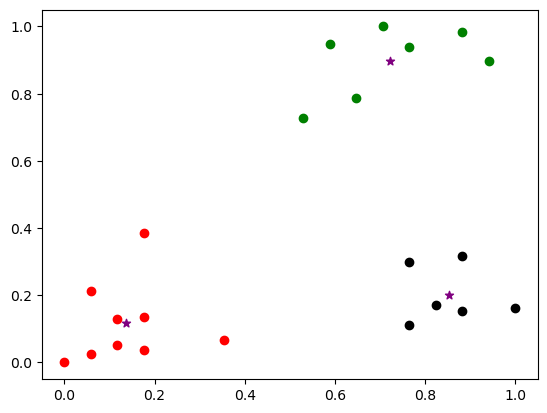

In [21]:
plt.scatter(df0.Age , df0['Income($)'], color = 'green')
plt.scatter(df1.Age , df1['Income($)'], color = 'red')
plt.scatter(df2.Age , df2['Income($)'], color = 'black')

plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color = 'purple',
           marker = "*" , label ='centroid')

## Example 2

In [22]:
df = pd.read_csv("C:/Users/hp/Downloads/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [24]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [25]:
df = df.iloc[:, : -2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [27]:
numerical_columns = df.iloc[:,9 :].select_dtypes(['int64', 'float64']).columns
numerical_columns

Index(['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [28]:
numerical_df = StandardScaler().fit_transform(df[numerical_columns])
numerical_df

array([[ 3.84620878e-01,  7.63942609e-01, -1.32713603e+00, ...,
        -9.73895182e-01,  3.83400260e+00, -7.75882235e-01],
       [ 1.01071482e+00,  1.40730617e+00, -1.32713603e+00, ...,
        -1.35734038e+00,  1.26085729e+01, -6.16275655e-01],
       [ 8.96451285e-03,  1.20579050e-01, -1.32713603e+00, ...,
        -1.91120566e+00,  6.80786367e+00, -9.97154993e-01],
       ...,
       [ 8.96451285e-03,  7.63942609e-01,  6.51940185e-01, ...,
        -2.07004789e-01,  4.44305026e-01, -9.97154993e-01],
       [ 8.96451285e-03,  1.20579050e-01,  6.51940185e-01, ...,
        -1.21794745e-01,  4.10696270e-02, -9.97154993e-01],
       [-1.36844216e+00,  1.40730617e+00, -3.37597923e-01, ...,
        -1.64399767e-01, -2.65557291e-01, -3.11572183e-01]])

## Elbow Method

In [29]:
scores_list = []
k_range = range(1,16)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k, random_state = 24)
    kmeans_model.fit(numerical_df)
    scores_list.append(kmeans_model.inertia_) 

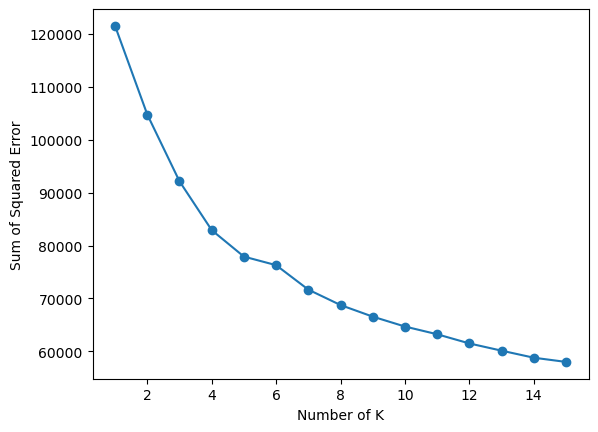

In [30]:
plt.xlabel("Number of K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_range, scores_list, marker = 'o')

## silhouette_score

In [31]:
scores_list = []
silhoutte_scores = []
k_range = range(2,16)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k, random_state = 24)
    y_pred = kmeans_model.fit_predict(numerical_df)
    scores_list.append(kmeans_model.inertia_)
    silhoutte_scores.append(silhouette_score(numerical_df, y_pred))
    
    print("K = ", k , "silhoutte Score = %0.4f" % silhouette_score(numerical_df, y_pred))

K =  2 silhoutte Score = 0.1368
K =  3 silhoutte Score = 0.1379
K =  4 silhoutte Score = 0.1580
K =  5 silhoutte Score = 0.1605
K =  6 silhoutte Score = 0.1319
K =  7 silhoutte Score = 0.1324
K =  8 silhoutte Score = 0.1215
K =  9 silhoutte Score = 0.1153
K =  10 silhoutte Score = 0.1157
K =  11 silhoutte Score = 0.1187
K =  12 silhoutte Score = 0.1165
K =  13 silhoutte Score = 0.1144
K =  14 silhoutte Score = 0.1169
K =  15 silhoutte Score = 0.1090


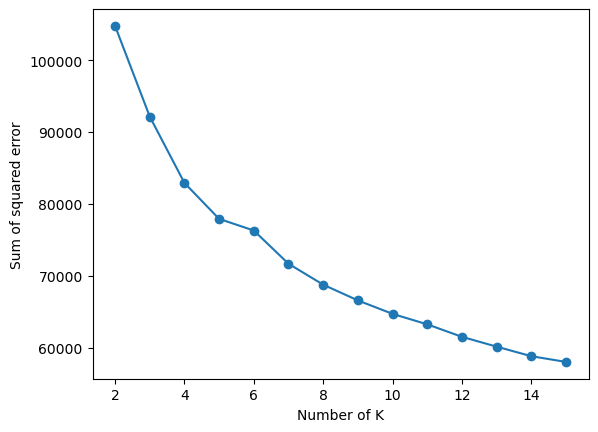

In [32]:
plt.xlabel("Number of K")
plt.ylabel("Sum of squared error")
plt.plot(k_range , scores_list, marker = 'o')

In [33]:
k = 4
kmeans_model = KMeans(n_clusters = 4 , random_state = 24)
kmeans_model.fit(numerical_df)
y_pred = kmeans_model.predict(numerical_df)
y_pred

array([3, 2, 2, ..., 1, 1, 2])

In [34]:
df['Cluster'] = y_pred
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,3
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2


In [35]:
kmeans_model.cluster_centers_

array([[-0.08948252, -1.06298482, -0.11738002, -0.25611404,  0.50075139,
         0.29712748,  0.47400853,  0.06985983,  2.49536477,  1.71017979,
         0.06210413, -0.33883249],
       [ 0.03376068,  0.04502527,  0.10736813,  0.1649742 , -0.29583535,
        -0.94817064, -0.21076897, -0.21428732, -0.32894463, -0.29702672,
        -0.26679425, -0.76648549],
       [-0.01013617,  0.18782702, -0.04366896, -0.08888529, -0.52005521,
         0.63695585, -0.57704963,  0.13095428, -0.26459834, -0.10527343,
         0.18379628,  0.93071536],
       [ 0.01670725,  0.08948543, -0.03377386,  0.07091339,  1.94458104,
         0.06153561,  1.93865604,  0.05214023, -0.22595351, -0.2203586 ,
         0.01889753, -0.81323154]])

In [36]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]

In [37]:
df0.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
8165,711701058,Existing Customer,48,F,4,Graduate,Married,Less than $40K,Silver,36,...,3,10973.0,1466,9507.0,0.802,4892,94,0.593,0.134,0
8271,719377383,Existing Customer,40,M,2,College,Single,$60K - $80K,Blue,28,...,3,10880.0,2025,8855.0,0.753,4957,90,0.765,0.186,0
8581,715091208,Existing Customer,42,M,3,High School,Married,$80K - $120K,Blue,36,...,3,18177.0,841,17336.0,0.888,8512,94,0.679,0.046,0
8587,823833483,Existing Customer,41,M,3,Graduate,Single,$40K - $60K,Blue,37,...,2,7839.0,1544,6295.0,0.715,7904,83,0.804,0.197,0
8588,717756258,Existing Customer,49,M,2,Unknown,Married,$120K +,Blue,38,...,3,16494.0,1158,15336.0,0.692,7761,84,0.647,0.070,0


In [38]:
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
14,712396908,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,...,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279,1
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,1
24,789124683,Existing Customer,54,M,2,Unknown,Married,$80K - $120K,Blue,42,...,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000,1
27,804424383,Existing Customer,63,M,1,Unknown,Married,$60K - $80K,Blue,56,...,2,10215.0,1010,9205.0,0.843,1904,40,1.000,0.099,1
28,718813833,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,...,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000,1


In [39]:
df2.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,2


In [40]:
df3.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,3
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,3
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,3
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,3
16,709967358,Existing Customer,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,...,3,30367.0,2362,28005.0,1.708,1671,27,0.929,0.078,3


In [41]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Cluster'],
      dtype='object')

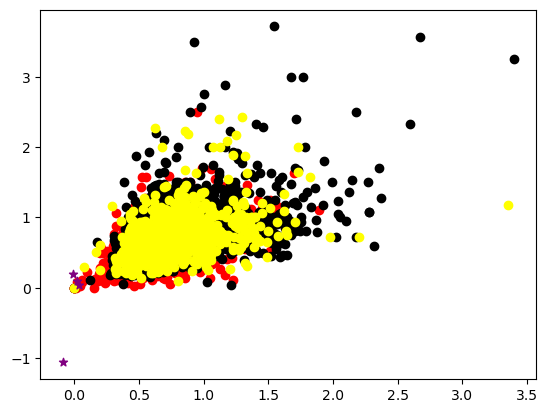

In [42]:
plt.scatter(df0['Total_Amt_Chng_Q4_Q1'] , df0['Total_Ct_Chng_Q4_Q1'], color = 'green')
plt.scatter(df1['Total_Amt_Chng_Q4_Q1'] , df1['Total_Ct_Chng_Q4_Q1'], color = 'red')
plt.scatter(df2['Total_Amt_Chng_Q4_Q1'] , df2['Total_Ct_Chng_Q4_Q1'], color = 'black')
plt.scatter(df3['Total_Amt_Chng_Q4_Q1'] , df3['Total_Ct_Chng_Q4_Q1'], color = 'yellow')


plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color = 'purple',
           marker = "*" , label ='centroid')

In [48]:
k = 2
kmeans_model = KMeans(n_clusters = 2 , random_state = 24)
kmeans_model.fit(numerical_df)
y_pred = kmeans_model.predict(numerical_df)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [49]:
df['Cluster'] = y_pred
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [50]:
kmeans_model.cluster_centers_

array([[-0.00619194,  0.11548336, -0.02992472, -0.07251678, -0.5245288 ,
         0.58549488, -0.57690876,  0.08912384, -0.1416599 , -0.05233229,
         0.12264925,  0.85536382],
       [ 0.00585991, -0.10929081,  0.02832007,  0.06862822,  0.49640204,
        -0.55409894,  0.54597323, -0.08434476,  0.13406368,  0.04952608,
        -0.11607244, -0.80949672]])

In [51]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]

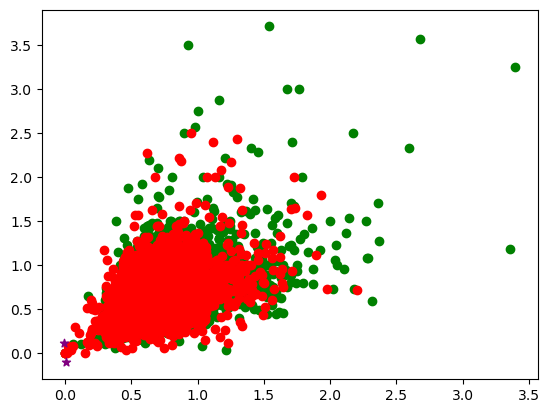

In [52]:
plt.scatter(df0['Total_Amt_Chng_Q4_Q1'] , df0['Total_Ct_Chng_Q4_Q1'], color = 'green')
plt.scatter(df1['Total_Amt_Chng_Q4_Q1'] , df1['Total_Ct_Chng_Q4_Q1'], color = 'red')



plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color = 'purple',
           marker = "*" , label ='centroid')